# Исследование объявлений о продаже квартир

**Цель исследования -** найти факторы, больше всего влияющие на стоимость квартир, чтобы научиться определят их рыночную стоимость.

**Ход исследования**

В нашем распоряжении база данных объявлений о продаже квартир в Санкт-Петербурге real_estate_data.csv. Проверим данные и провелем их исследовательский анализ.

Нужно проверить данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки поискать возможность исправить самые критичные ошибки данных. Затем провести исследовательский анализ и сделать вывод.

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50) 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
real_estate_data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим на размер данных, названия признаков и их типы.

In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что в таблице 23650 строки и 22 столбца с различными типами данных

bool, int64, float64 и object — это типы признаков. Видим, что 2 признака — логический (bool), 3 признака имеют тип object и 17 признаков — числовые. Также с помощью метода info удобно быстро посмотреть на пропуски в данных, в нашем случае они есть, не в каждом столбце по 23650 наблюдений

### Вывод

В каждой строке - данные по одному объекту недвижимости. Часть колонок описана самими пользователями - в основном характеристики квартиры, такие как площадь, высота потолков и наличие балкона. Остальные данные получены автоматически и определяют удобситва окружающей среды, такие как дальность от центра или аэропорта, наличие пруда или парка в пешей доступности. 

Всего в таблице 23699 строк, однако, не во всех столбцах есть данные. Нам известено, что часть данных предоставили пользователи, такие данные могут содеражть опечатки. Однако, отсутствие данных не всегда является ошибкой, например количество балконов может равнятьсяя нулю. Каждый столбец нужно изучить на предмет пропусков, неуместных значений и значений неподходящих типов.

## Предобработка данных

### Проверим значения в столбцах на наличие аномалий

In [5]:
def investigate_column(column):
    print('Nul or Na count is', column.isna().sum())
    print(column.describe())

In [6]:
real_estate_data.duplicated().sum() #проверим датасет на наличие явных дубликатов

0

#### "rooms"

 - Изучим данные

In [7]:
investigate_column(real_estate_data["rooms"])

Nul or Na count is 0
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [8]:
f'Доля пропусков в таблице составляет {(real_estate_data["rooms"].isna().sum())/len(real_estate_data["rooms"]):.1%}'

'Доля пропусков в таблице составляет 0.0%'

In [9]:
real_estate_data["rooms"] = real_estate_data["rooms"].dropna()

In [10]:
real_estate_data["rooms"].isna().sum()

0


####  "last_price"



* Изучим значения


In [11]:

investigate_column(real_estate_data["last_price"])


Nul or Na count is 0
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


In [12]:
real_estate_data["last_price"] = real_estate_data["last_price"] / 1000 #переведем стоимость квартиры в тыс рублей.
real_estate_data["last_price"] = real_estate_data["last_price"].round(2)

In [13]:
real_estate_data["last_price"].describe()

count     23699.000000
mean       6541.548770
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64


**Вывод**

	- Обнаруженные аномалии: в столбце нет пропусков, среднее значение цены больше медианного
	- Причины:  такой перекос вызван наличием необычайно высоких значений. Эти слишком большие величины смещают среднее значение вправо, и оно становится больше медианы


####  "first_day_exposition"



* Изучим значения


In [14]:

investigate_column(real_estate_data["first_day_exposition"])


Nul or Na count is 0
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object



**Вывод**

	- В таблице представлены даты с типом object. Для работы с такими данными переведем строку к типу datetime 
    - для того, чтобы в будущем извлекать количество часов, день в неделе и год.


In [15]:
real_estate_data["first_day_exposition"] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
real_estate_data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


#### "floors_total"



* Изучим значения


In [16]:

investigate_column(real_estate_data["floors_total"])


Nul or Na count is 86
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [17]:
f'Доля пропусков в таблице составляет {(real_estate_data["floors_total"].isna().sum())/len(real_estate_data["floors_total"]):.1%}'

'Доля пропусков в таблице составляет 0.4%'


**Вывод**

	- Обнаруженные аномалии: 86 пропусков в данных
	- Причины: пользователь не указал этажность в объявлении
	- Как исправлять: предположим, что, где этажность не указана. она равна этажу, на котором расположена квартира. 
	- Финальный тип и почему: этажность должна быть целочисленной, исправим на int64

In [18]:
real_estate_data.dropna(subset=['floors_total'], inplace=True) #удалим пропуски

In [19]:
real_estate_data["floors_total"].isna().sum()

0

#### "ceiling_height"


* Изучим значения

In [20]:
investigate_column(real_estate_data["ceiling_height"])

Nul or Na count is 9118
count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [21]:
f'Доля пропусков в таблице составляет {(real_estate_data["ceiling_height"].isna().sum())/len(real_estate_data["ceiling_height"]):.1%}'

'Доля пропусков в таблице составляет 38.6%'

**Вывод**

	- Обнаруженные аномалии: в столбце 9 тысяч пропусков. А ещё есть значения с высотой потолков 100м! 
	- Причины: пропуски появились, так как пользователь не указал величину потолков.
	- Как исправлять: сгруппируем данные по населенному пункту и этажности

In [22]:
real_estate_data.drop([22869], inplace=True) #удалим единственную строчку с потолками 100 метров
investigate_column(real_estate_data["ceiling_height"])

Nul or Na count is 9118
count    14494.000000
mean         2.764787
std          0.969038
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


In [23]:
#med_floor = real_estate_data.groupby('floors_total')['ceiling_height'].median() #создаем переменную по медиане высоты потолков в зависимости от этажности здания
#for floor in real_estate_data.floors_total.unique(): #перебирает все уникальные значения floors_total
    #median = med_floor[floor] #берем медиану по нужному количеству этажей
    #real_estate_data.loc[(real_estate_data['floors_total'] == floor) & (real_estate_data['ceiling_height'].isna()), 'ceiling_height'] = median #заменяем пропуск в ячейке на выбранную медиану

In [24]:
med_floor = real_estate_data.groupby('floors_total')['ceiling_height'].transform('mean')
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(med_floor)

In [25]:
real_estate_data.loc[real_estate_data['ceiling_height'].isna()]#проверим, что все пропуски ушли

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


In [26]:
#остался пропуск, это единcственное значение с этажностью 33, поэтому для него не нашлось медианного
real_estate_data.drop([11575], inplace=True) #удалим его из таблицы

In [27]:
real_estate_data['ceiling_height'].isna().sum()

0


#### "living_area"



* Изучим значения


In [28]:

investigate_column(real_estate_data["living_area"])


Nul or Na count is 1870
count    21741.000000
mean        34.462870
std         22.037651
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


In [29]:
f'Доля пропусков в таблице составляет {(real_estate_data["living_area"].isna().sum())/len(real_estate_data["living_area"]):.1%}'

'Доля пропусков в таблице составляет 7.9%'


**Вывод**

	- Обнаруженные аномалии: в данных есть 1903 пропущенных значения, судя по высокому стандартному отклонению в данных очень большой разброс значений
	- Причины: эту информаицю не указал пользователь
	- Как исправлять: предположим, что всё, что не кухня - жилая зона. 

In [30]:
new = real_estate_data[['total_area','living_area', 'kitchen_area']]
new

,total_area,living_area,kitchen_area
0,108.00,51.0,25.00
1,40.40,18.6,11.00
2,56.00,34.3,8.30
3,159.00,NaN,NaN
4,100.00,32.0,41.00
...,...,...,...
23694,133.81,73.3,13.83
23695,59.00,38.0,8.50
23696,56.70,29.7,NaN
23697,76.75,NaN,23.30


In [31]:
def living_area_na(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    living_area = row['living_area']
    
    if math.isnan(living_area) & ~math.isnan(kitchen_area):
        row['living_area'] = total_area - kitchen_area

    return row['living_area']

real_estate_data['living_area'] = real_estate_data.apply(living_area_na, axis=1)


In [32]:
real_estate_data[['total_area','living_area','kitchen_area']].isna().sum()

total_area         0
living_area     1431
kitchen_area    2231
dtype: int64

Не все пропуски заполнились, так как не хватате данных по площади кухни. Вернемся к ним, когда разберемся с пропусками в других столбцах


#### "is_apartment"




* Изучим значения


In [33]:

investigate_column(real_estate_data["is_apartment"])


Nul or Na count is 20838
count      2773
unique        2
top       False
freq       2724
Name: is_apartment, dtype: object


In [34]:
real_estate_data['is_apartment'].value_counts()

False    2724
True       49
Name: is_apartment, dtype: int64

In [35]:
f'Доля пропусков в таблице составляет {(real_estate_data["is_apartment"].isna().sum())/len(real_estate_data["is_apartment"]):.1%}'

'Доля пропусков в таблице составляет 88.3%'


**Вывод**

	- Обнаруженные аномалии: 88% значений пропущены
	- Причины: если значения нет - то скорее всего имелось в виду, что это не апартаменты
	- Как исправлять: заменим пропуски на False

In [36]:
real_estate_data['is_apartment']=real_estate_data['is_apartment'].fillna(False)
real_estate_data['is_apartment'].value_counts()

False    23562
True        49
Name: is_apartment, dtype: int64

Если 1 - это апартамент.


#### "kitchen_area"



* Изучим значения


In [37]:
investigate_column(real_estate_data["kitchen_area"])

Nul or Na count is 2231
count    21380.000000
mean        10.563619
std          5.904160
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [38]:
f'Доля пропусков в таблице составляет {(real_estate_data["kitchen_area"].isna().sum())/len(real_estate_data["kitchen_area"]):.1%}'

'Доля пропусков в таблице составляет 9.4%'


**Вывод**

	- Обнаруженные аномалии: Количество пропусков большое, надо исправлять
	- Причины: скорее всего пользователь не знал или пропустил случайно
	- Как исправлять: найдем разницу между общей площадью и жилой и заполним этими значениями пропуски


In [39]:
def replace_na_kitchen(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    living_area = row['living_area']
    
    if math.isnan(kitchen_area) & ~math.isnan(living_area):
        row['kitchen_area'] = total_area - living_area
        
    return row['kitchen_area']
 
real_estate_data['kitchen_area'] = real_estate_data.apply(replace_na_kitchen, axis=1)

In [40]:

f'Новая доля пропусков в таблице составляет {(real_estate_data["kitchen_area"].isna().sum())/len(real_estate_data["kitchen_area"]):.1%}'

'Новая доля пропусков в таблице составляет 6.1%'

Мы уменьшили долю пропусков, но их всё равно много. Найдём отношение площади кухни к общей площади

In [41]:
ratio_df=real_estate_data[['total_area','living_area','kitchen_area','rooms']]
ratio_df['ratio']=ratio_df['kitchen_area']/ratio_df['total_area']
ratio_df.head()

/tmp/ipykernel_90/1906707328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_df['ratio']=ratio_df['kitchen_area']/ratio_df['total_area']


,total_area,living_area,kitchen_area,rooms,ratio
0,108.0,51.0,25.0,3,0.231481
1,40.4,18.6,11.0,1,0.272277
2,56.0,34.3,8.3,2,0.148214
3,159.0,NaN,NaN,3,NaN
4,100.0,32.0,41.0,2,0.410000


In [42]:
ratio_df['ratio'].describe()

count    22180.000000
mean         0.194072
std          0.083369
min          0.000000
25%          0.134529
50%          0.175385
75%          0.239130
max          0.913043
Name: ratio, dtype: float64

Среднее и медианное отношение кухни к общей площади очень близки. Пусть пропуски будут равны 18% от общей площади 

In [43]:
#сгруппируем данные по комнаты и найдем медианное отношение кухни к общей площади
grouped_rooms=ratio_df.groupby('rooms').agg({'ratio':'mean'}).reset_index()
grouped_rooms.head()

,rooms,ratio
0,0,0.314533
1,1,0.255939
2,2,0.179757
3,3,0.144643
4,4,0.128723


In [44]:
#добавим в основную таблицу ratio


In [45]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio
0,20,13000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.144643
1,0,64900.0,159.0,2015-07-24,3,2.731545,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.144643
2,18,5400.0,61.0,2017-02-26,3,2.500000,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.144643
3,11,6700.0,82.0,2017-11-23,3,3.050000,5.0,55.6,1,False,False,False,9.0,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,0.144643
4,16,14200.0,121.0,2019-01-09,3,2.750000,16.0,76.0,8,False,False,False,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,0.144643


In [46]:
def complete_kitchen_na(row):
    total=row['total_area']
    ratio=row['ratio']
    kitchen_area=row['kitchen_area']
    if math.isnan(kitchen_area):
        row['kitchen_area'] = ratio * total #найдём площадь кухни путем умножения среднего отношения кухни к общей плоащади в зависимости от количества комнат
    
    return row['kitchen_area']
 
real_estate_data['kitchen_area'] = real_estate_data.apply(complete_kitchen_na, axis=1)

In [47]:
real_estate_data['kitchen_area'].isna().sum() #проверим, что пропуски ушли

0


#### "balcony"



* Изучим значения


In [48]:

investigate_column(real_estate_data["balcony"])


Nul or Na count is 11480
count    12131.000000
mean         1.153986
std          1.070490
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


In [49]:
f'Доля пропусков в таблице составляет {(real_estate_data["balcony"].isna().sum())/len(real_estate_data["balcony"]):.1%}'

'Доля пропусков в таблице составляет 48.6%'


**Вывод**

	- Обнаруженные аномалии: есть 11519 пустых занчений. 
	- Причины: если пользователь не указал наличие балкона, скорее всего это значит, что балкона там нет
	- Как исправлять: заменим все пропуски нулями
	- Финальный тип и почему: у данных тип дробного числа, заменим на целое


In [50]:
real_estate_data["balcony"].fillna(0, inplace=True)
real_estate_data["balcony"].isna().sum()

0


#### "locality_name"



* Изучим значения


In [51]:
investigate_column(real_estate_data["locality_name"])

Nul or Na count is 48
count               23563
unique                364
top       Санкт-Петербург
freq                15649
Name: locality_name, dtype: object


In [52]:
f'Доля пропусков в таблице составляет {(real_estate_data["locality_name"].isna().sum())/len(real_estate_data["locality_name"]):.1%}'

'Доля пропусков в таблице составляет 0.2%'


**Вывод**

	- Обнаруженные аномалии: есть 49 пропусков
	- Причины: пользователь забыл указать данные в объявлении
	- Как исправлять: удалим путсые строчки в столбце


In [53]:
real_estate_data.dropna(subset=['locality_name'], inplace=True)
real_estate_data.locality_name.isna().sum()

0

Проверим столбец на наличие дубликатов

In [54]:
real_estate_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Очень много неявных дубликатов в названиях населённых пунктов:
  - в одном случае нас.пункт написан с е, вдругом с ё
  - замена синонимом, например, городской поселок - поселок городского типа 

Для начала заменим все ё на е

In [55]:
real_estate_data.locality_name = real_estate_data.locality_name.str.replace('ё', 'е')

In [56]:
#Функция, которая делает список из типов населенных пунктов
def title_parse(title): #берет строку
    res = ' '.join(word for word in title.split(' ') if word.islower()) #и разбивает на список при помощи пробелов
    return res

In [57]:
real_estate_data['area_type'] = real_estate_data.locality_name.apply(title_parse)
real_estate_data['area_type'].unique()

array(['', 'поселок', 'деревня', 'поселок городского типа',
       'городской поселок', 'поселок городского типа имени', 'село',
       'поселок станции', 'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'поселок при железнодорожной станции',
       'коттеджный поселок', 'поселок 69-й километр'], dtype=object)

In [58]:
#приведем типы населенных пунктов к одному виду
real_estate_data['area_type'] = real_estate_data['area_type'].replace('городской поселок', 'пгт')
real_estate_data['area_type'] = real_estate_data['area_type'].replace('поселок городского типа имени', 'пгт')
real_estate_data['area_type'] = real_estate_data['area_type'].replace('поселок городского типа', 'пгт')
real_estate_data['area_type'] = real_estate_data['area_type'].replace('поселок при железнодорожной станции', 'поселок станции')
real_estate_data['area_type'] = real_estate_data['area_type'].replace('поселок 69-й километр', 'поселок станции')
real_estate_data['area_type'] = real_estate_data['area_type'].replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [59]:
real_estate_data['area_type'].unique()

array(['', 'поселок', 'деревня', 'пгт', 'село', 'поселок станции',
       'садовое товарищество', 'коттеджный поселок'], dtype=object)

In [60]:
real_estate_data.loc[~real_estate_data.locality_name.str.istitle(), "locality_name"] = real_estate_data.locality_name.apply( 
    lambda title: ' '.join(word for word in title.split(' ') if word.istitle()) 
)

In [61]:
real_estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'Парголово', 'Гатчина', 'Сертолово',
       'Федоровское', 'Кировск', 'Новое Девяткино', 'Шушары', 'Сиверский',
       'Приозерск', 'Куттузи', 'Заклинье', 'Торковичи', 'Красное Село',
       'Ломоносов', 'Всеволожск', 'Новый Свет', 'Шлиссельбург',
       'Кингисепп', 'Сосновый Бор', 'Оржицы', 'Ивангород', 'Кириши',
       'Луга', 'Пушкин', 'Колпино', 'Оредеж', 'Волосово', 'Янино-1',
       'Металлострой', 'Молодежное', 'Тихвин', 'Кронштадт', 'Победа',
       'Нурма', 'Тосно', 'Пикалево', 'Подпорожье', 'Сестрорецк',
       'Токсово', 'Выборг', 'Старая', 'Кузьмоловский', 'Петергоф',
       'Севастьяново', 'Кудрово', 'Лопухинка', 'Лесогорский', 'Лаголово',
       'Цвелодубово', 'Волхов', 'Мурино', 'Батово', 'Приморск',
       'Романовка', 'Сельцо', 'Новая Ладога', 'Тельмана', 'Свердлова',
       'Рябово', 'Рощино', 'Сланцы', 'Бугры', 'Тайцы', 'Отрадное',
       'Калитино', 'Ульяновка', 'Малое Карлино', 'Войсковицы', 'Стрельна',
       'Ропша', 'Рабитицы', 'Николь

In [62]:
#функция, чтобы отбросить типы населенных пунктов и оставить только название

def name_parese(title): #берет строку
    res = ' '.join(word for word in title.split(' ') if word.islower()==False) #и разбивает на список при помощи пробелов
    return res

In [63]:
real_estate_data['area_type'] = real_estate_data['area_type'].replace('','город')

In [64]:
set(real_estate_data['area_type'].tolist())

{'город',
 'деревня',
 'коттеджный поселок',
 'пгт',
 'поселок',
 'поселок станции',
 'садовое товарищество',
 'село'}


#### "airports_nearest"



* Изучим значения


In [65]:
investigate_column(real_estate_data["airports_nearest"])

Nul or Na count is 5524
count    18039.000000
mean     28797.298852
std      12632.894337
min          0.000000
25%      18561.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [66]:
f'Доля пропусков в таблице составляет {(real_estate_data["airports_nearest"].isna().sum())/len(real_estate_data["airports_nearest"]):.1%}'

'Доля пропусков в таблице составляет 23.4%'


**Вывод**

	- Обнаруженные аномалии: очень много пропусков
	- Причины: это может означать, что поблизости нет аэропорта
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать

In [67]:
real_estate_data["airports_nearest"] = real_estate_data["airports_nearest"].fillna(-1)
real_estate_data["airports_nearest"].isna().sum()

0


#### "cityCenters_nearest"



* Изучим значения


In [68]:

investigate_column(real_estate_data["cityCenters_nearest"])


Nul or Na count is 5501
count    18062.000000
mean     14192.637139
std       8613.587200
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [69]:
f'Доля пропусков в таблице составляет {(real_estate_data["cityCenters_nearest"].isna().sum())/len(real_estate_data["cityCenters_nearest"]):.1%}'

'Доля пропусков в таблице составляет 23.3%'


**Вывод**

	- Обнаруженные аномалии: количество пропусков составляет более 20%
	- Причины: скорее всего такие пропуски есть в объявлениях о крватирах в населенных пунктах не в городе, а в пгт или садоводствах.
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать

In [70]:
real_estate_data["cityCenters_nearest"] = real_estate_data["cityCenters_nearest"].fillna(-1)
real_estate_data["cityCenters_nearest"].isna().sum()

0

Посчитаю целочисленное расстояние до центра в км по полю `cityCenter_nearest`. Результат сохраню в столбец `center_distance_km`.

In [71]:
real_estate_data['center_distance_km'] = real_estate_data['cityCenters_nearest'] / 1000
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio,area_type,center_distance_km
0,20,13000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.144643,город,16.028
1,0,64900.0,159.0,2015-07-24,3,2.731545,14.0,NaN,9,False,False,False,22.998198,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.144643,город,6.800
2,18,5400.0,61.0,2017-02-26,3,2.500000,9.0,43.6,7,False,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.144643,город,15.008
3,11,6700.0,82.0,2017-11-23,3,3.050000,5.0,55.6,1,False,False,False,9.000000,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,0.144643,город,10.698
4,16,14200.0,121.0,2019-01-09,3,2.750000,16.0,76.0,8,False,False,False,12.000000,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,0.144643,город,12.843



#### "parks_around3000"



* Изучим значения


In [72]:

investigate_column(real_estate_data["parks_around3000"])

Nul or Na count is 5500
count    18063.000000
mean         0.611582
std          0.802114
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


In [73]:
f'Доля пропусков в таблице составляет {(real_estate_data["parks_around3000"].isna().sum())/len(real_estate_data["parks_around3000"]):.1%}'

'Доля пропусков в таблице составляет 23.3%'


**Вывод**

	- Обнаруженные аномалии: данных нет у четверти объявлений
	- Причины: скорее всего это означает полное отсутствие парков в радиусе 3 км. Ещё я заметила, что медианное значение больше среднего. Это означает, что больших значений мало.
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать.

In [74]:
real_estate_data["parks_around3000"] = real_estate_data["parks_around3000"].fillna(-1)
real_estate_data["parks_around3000"].isna().sum()

0


#### "parks_nearest"



* Изучим значения


In [75]:

investigate_column(real_estate_data["parks_nearest"])


Nul or Na count is 15534
count    8029.000000
mean      490.613775
std       341.581173
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [76]:
f'Доля пропусков в таблице составляет {(real_estate_data["parks_nearest"].isna().sum())/len(real_estate_data["parks_nearest"]):.1%}'

'Доля пропусков в таблице составляет 65.9%'


**Вывод**

	- Обнаруженные аномалии: Пропуски составляют больше половины, а точнее 66%
	- Причины: большинство квартир не имеют рядом парков, потому этот критерий остался незаполненным.
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать

In [77]:
real_estate_data["parks_nearest"] = real_estate_data["parks_nearest"].fillna(-1)
real_estate_data["parks_nearest"].isna().sum()

0


#### "ponds_around3000"



* Изучим значения


In [78]:

investigate_column(real_estate_data["ponds_around3000"])


Nul or Na count is 5500
count    18063.000000
mean         0.769252
std          0.938428
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


In [79]:

f'Доля пропусков в таблице составляет {(real_estate_data["ponds_around3000"].isna().sum())/len(real_estate_data["ponds_around3000"]):.1%}'

'Доля пропусков в таблице составляет 23.3%'


**Вывод**

	- Обнаруженные аномалии: в некоторых строчках не хватает данных
	- Причины: это значит, что в радиусе 3 км нет пруда
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать


In [80]:

real_estate_data["ponds_around3000"] = real_estate_data["ponds_around3000"].fillna(-1)
real_estate_data["ponds_around3000"].isna().sum()


0


#### "ponds_nearest"



* Изучим значения


In [81]:

investigate_column(real_estate_data["ponds_nearest"])


Nul or Na count is 14529
count    9034.000000
mean      518.392074
std       277.954592
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


In [82]:

f'Доля пропусков в таблице составляет {(real_estate_data["ponds_nearest"].isna().sum())/len(real_estate_data["ponds_nearest"]):.1%}'

'Доля пропусков в таблице составляет 61.7%'


**Вывод**

	- Обнаруженные аномалии: в 2/3 объявлений информации о ближайщем пруде проигнорирована. 
	- Причины: Скорее всего это означает, что пруда там нет или он не стоит упоминания
	- Как исправлять: заменим такие пропуски на "-1", чтобы было легче фильтровать

In [83]:
real_estate_data["ponds_nearest"] = real_estate_data["ponds_nearest"].fillna(-1)
real_estate_data["ponds_nearest"].isna().sum()

0


#### "days_exposition"



* Изучим значения


In [84]:

investigate_column(real_estate_data["days_exposition"])


Nul or Na count is 3171
count    20392.000000
mean       180.755590
std        219.738817
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [85]:

f'Доля пропусков в таблице составляет {(real_estate_data["days_exposition"].isna().sum())/len(real_estate_data["days_exposition"]):.1%}'

'Доля пропусков в таблице составляет 13.5%'


**Вывод**

	- Обнаруженные аномалии: в данных 3181 пропуска
	- Причины: мы пока не знаем, почему этих данных нет, поставим заплатку, а потом поменяем на среднее.

In [86]:
real_estate_data["days_exposition"] = real_estate_data["days_exposition"].fillna(-1)
real_estate_data["days_exposition"].isna().sum()

0

### Приведем данные к нужным типам

In [87]:
real_estate_data['rooms'] = real_estate_data['rooms'].astype('int64')
real_estate_data['floor'] = real_estate_data['floor'].astype('int64')
real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('int64')
real_estate_data['center_distance_km'] = real_estate_data['center_distance_km'].astype('int64')
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int64')
real_estate_data["days_exposition"] = real_estate_data["days_exposition"].astype('int64')

### Вывод

Пропуски отработаны, типы данных в столбцах `floors_total`, `ceiling_height`, `is_apartment`, `studio` и `open_plan` изменен.
Населённые пункты были разбиты по следующим категориям:

- город
- деревня
- коттеджный поселок
- пгт
- поселок
- поселок станции
- садовое товарищество
- село

эти категории помогут в дальнейшем исследовании проследить зависимость цены от различных факторов

In [88]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23610
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  float64       
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        23563 non-null  float64       
 6   floors_total          23563 non-null  int64         
 7   living_area           22136 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          23563 non-null  bool          
 10  studio                23563 non-null  bool          
 11  open_plan             23563 non-null  bool          
 12  kitchen_area          23563 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

### цена квадратного метра

Добавим в таблицу цену за квадртаный метр. Для этого разделим стоимость квартиры `last_price` на общий метраж `total_area`

In [89]:
real_estate_data['price_per_area']=real_estate_data['last_price'] / real_estate_data['total_area']
real_estate_data['price_per_area']=real_estate_data['price_per_area'].round(2)
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio,area_type,center_distance_km,price_per_area
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1,0.144643,город,16,120.37
1,0,64900.0,159.0,2015-07-24,3,2.731545,14,NaN,9,False,False,False,22.998198,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.144643,город,6,408.18
2,18,5400.0,61.0,2017-02-26,3,2.500000,9,43.6,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289,0.144643,город,15,88.52
3,11,6700.0,82.0,2017-11-23,3,3.050000,5,55.6,1,False,False,False,9.000000,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,-1.0,397,0.144643,город,10,81.71
4,16,14200.0,121.0,2019-01-09,3,2.750000,16,76.0,8,False,False,False,12.000000,0,Санкт-Петербург,38900.0,12843.0,0.0,-1.0,0.0,-1.0,97,0.144643,город,12,117.36


### день недели, месяц и год публикации объявления

Извлечем из поля `first_day_exposition` день недели(`first_exposition_day_of_week`), месяц (`first_exposition_month`) и год публикации объявления (`first_exposition_year`)

In [90]:
real_estate_data['first_exposition_day_of_week'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).weekday
real_estate_data['first_exposition_month'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['first_exposition_year'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year
real_estate_data[['first_day_exposition','first_exposition_day_of_week','first_exposition_month', 'first_exposition_year']].head()

,first_day_exposition,first_exposition_day_of_week,first_exposition_month,first_exposition_year
0,2019-03-07,3,3,2019
1,2015-07-24,4,7,2015
2,2017-02-26,6,2,2017
3,2017-11-23,3,11,2017
4,2019-01-09,2,1,2019


Дни недели в столбце `first_exposition_day_of_week` представлены следующим образом: понедельник=0, воскресенье=6.

In [91]:
#добавим в таблицу столбец с категорией этажа: первый, последний и другой
def floor_type(row):
   
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'

In [92]:
real_estate_data['floor_type'] = real_estate_data.apply(floor_type, axis=1)
real_estate_data.tail(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio,area_type,center_distance_km,price_per_area,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_type
23605,15,88000.0,400.0,2019-03-27,9,2.500000,2,250.0,1,False,False,False,50.0,0,Санкт-Петербург,24395.0,2725.0,2.0,315.0,1.0,578.0,-1,0.075054,город,2,220.00,2,3,2019,первый
23606,14,29000.0,292.2,2017-01-12,9,3.350000,5,225.9,4,False,False,False,32.9,1,Санкт-Петербург,24892.0,5162.0,2.0,263.0,0.0,-1.0,825,0.075054,город,5,99.25,3,1,2017,другой
23607,0,24000.0,250.0,2019-04-23,9,3.200000,5,160.6,3,False,False,False,11.7,0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,-1.0,-1,0.075054,город,9,96.00,1,4,2019,другой
23608,6,32250.0,374.6,2018-06-09,19,2.766668,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,-1.0,2.0,548.0,114,0.073679,город,3,86.09,5,6,2018,другой
23609,6,28500.0,270.0,2015-03-02,16,3.000000,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,-1.0,1365,0.048148,город,4,105.56,0,3,2015,последний
23610,8,420000.0,900.0,2017-12-06,12,2.800000,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,-1.0,2.0,318.0,106,0.124444,город,7,466.67,2,12,2017,последний


###  соотношение жилой и общей площади

Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [93]:
real_estate_data['living_total_ratio'] = real_estate_data['living_area']/real_estate_data['total_area']
real_estate_data['kitchen_total_ratio'] = real_estate_data['kitchen_area']/real_estate_data['total_area']
real_estate_data.drop(columns = ['ratio'],axis = 1, inplace=True)

### отношение площади кухни к общей.

Не везде можно найти отношение жилой площади к общей площади, так как не хватате данных. 

Предположим, что всё, что не кухня - жилая площадь.Заполним пропуски в `living_area` разницей между `total_area` и `kitchen_area`

In [94]:
def living_area_na(row):
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    living_area = row['living_area']
    
    if math.isnan(living_area):
        row['living_area'] = total_area - kitchen_area

    return row['living_area']

real_estate_data['living_area'] = real_estate_data.apply(living_area_na, axis=1)

In [95]:
real_estate_data['living_total_ratio'] = real_estate_data['living_area']/real_estate_data['total_area']

In [96]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_type,center_distance_km,price_per_area,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_type,living_total_ratio,kitchen_total_ratio
0,20,13000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1,город,16,120.37,3,3,2019,другой,0.472222,0.231481
1,0,64900.0,159.0,2015-07-24,3,2.731545,14,136.001802,9,False,False,False,22.998198,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,город,6,408.18,4,7,2015,другой,0.855357,0.144643
2,18,5400.0,61.0,2017-02-26,3,2.500000,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0.0,-1.0,0.0,-1.0,289,город,15,88.52,6,2,2017,другой,0.714754,0.106557
3,11,6700.0,82.0,2017-11-23,3,3.050000,5,55.600000,1,False,False,False,9.000000,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,-1.0,397,город,10,81.71,3,11,2017,первый,0.678049,0.109756
4,16,14200.0,121.0,2019-01-09,3,2.750000,16,76.000000,8,False,False,False,12.000000,0,Санкт-Петербург,38900.0,12843.0,0.0,-1.0,0.0,-1.0,97,город,12,117.36,2,1,2019,другой,0.628099,0.099174


## Исследовательский анализ данных

### Изучите параметры

#### total_area, last_price, rooms и ceiling_height 

Построю гистограмму для `total_area`, `last_price`, `rooms` и `ceiling_height` с помощью матрицы диаграммы рассеяния.

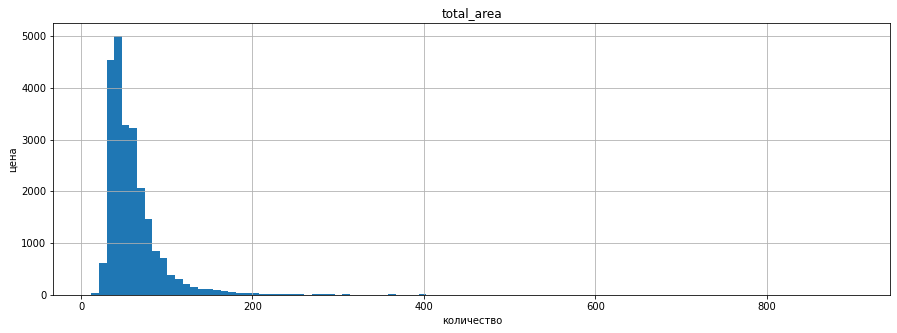

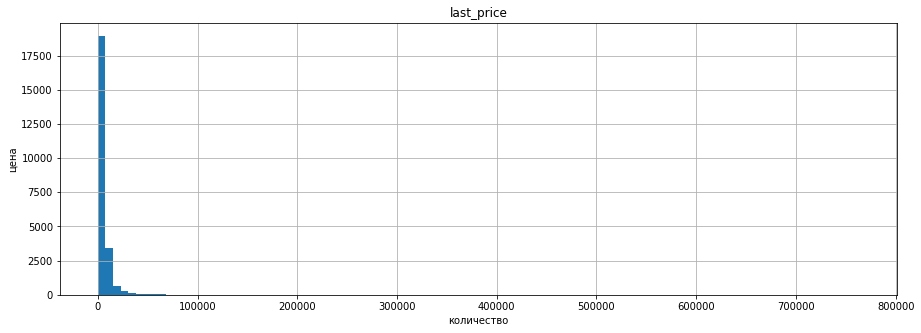

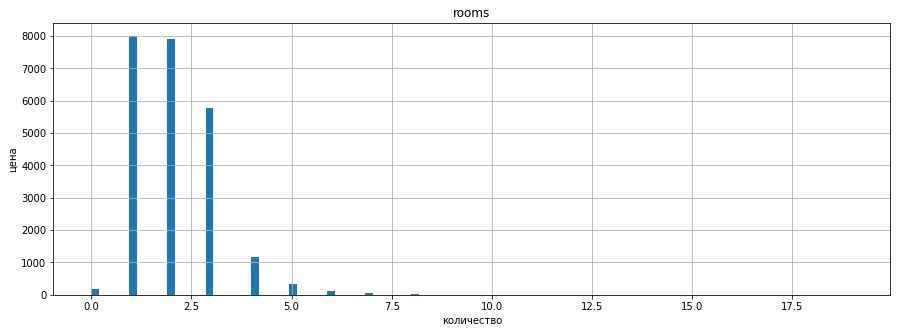

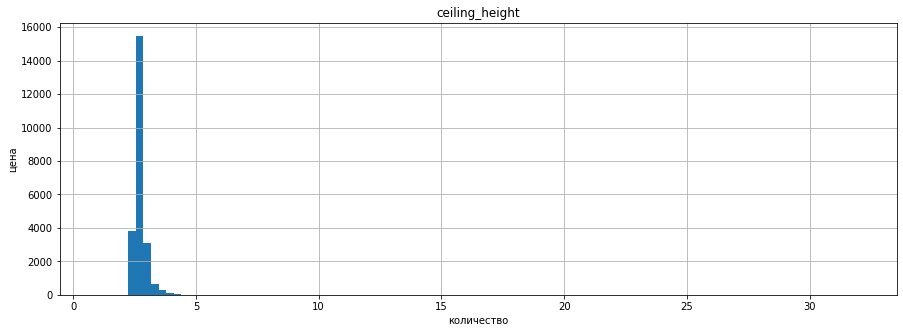

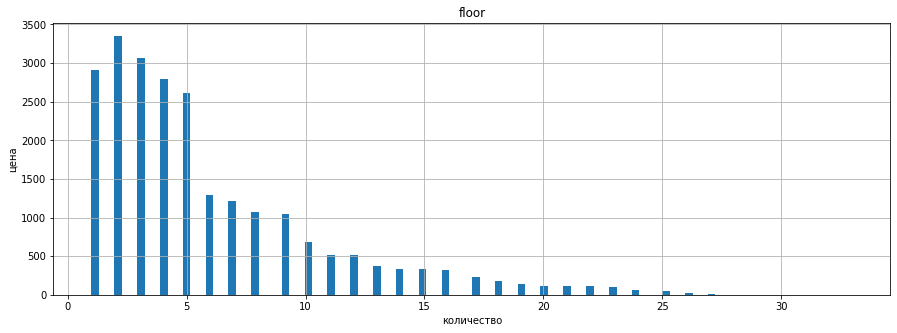

In [97]:
for column in real_estate_data[['total_area','last_price', 'rooms', 'ceiling_height', 'floor']]: 
    real_estate_data.hist(column, bins=100, figsize = (15,5))
    plt.ylabel('цена')
    plt.xlabel('количество')
    plt.show()

In [98]:
real_estate_data[['total_area','last_price', 'rooms', 'ceiling_height', 'floor']].describe()

,total_area,last_price,rooms,ceiling_height,floor
count,23563.000000,23563.000000,23563.000000,23563.000000,23563.000000
mean,60.322597,6539.556630,2.070662,2.765394,5.877053
std,35.656846,10911.236626,1.078597,0.767739,4.868715
min,12.000000,12.190000,0.000000,1.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.599093,2.000000
50%,52.000000,4646.000000,2.000000,2.710000,4.000000
75%,69.700000,6790.000000,3.000000,2.782385,8.000000
max,900.000000,763000.000000,19.000000,32.000000,33.000000


**Вывод**

Из построенных гистограм и статистического анализа видно, что типичными параметрами продаваемых квартир являются:

    -квартиры общей площадью 60.3 кв.м
    -последняя цена размещенеия 6.5 м
    -2 комнаты
    -высота потолков 2.8м
    -6-этажный дом.
    
Однако, в данных присутствуют аномалии, например, цена за квартиру - 12 000 рублей, отсуствие комнат или высота потолков 1 м или 33 метра.

Чтобы не фильтровать аномалии вручную пофиксим при помощи функции: выбросами могут считаться данные меньше (квартиль 1 минус 1,5 * IQR) и больше (квартиль 3 плюс 1,5 * IQR), где IQR - это разница между квартилем 3 и квартилем 1

In [99]:
# Находим долю пропусков
def print_null_share(data, column):
    null_sum = data[column].isna().sum()
    null_to_len = null_sum / len(data[column])
    print(f"Доля пропусков в столбце '{column}': {null_to_len:.2%}.")
    print(f'Пропусков всего: {null_sum}.')

# Определяем границы выбросов
def define_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_border = q1 - (1.5 * iqr)
    upper_border = q3 + (1.5 * iqr)
    return lower_border, upper_border
       
# Убираем выбросы, заменяем на NaN
def fixing_outliers(data, columns_to_fix):
    for column in columns_to_fix:
        print_null_share(data, column)
        bottom, top = define_outliers(data, column)
        print('--> Превращаем выбросы в пропуски данных. -->')
        data.loc[(data[column] < bottom), column] = np.nan
        data.loc[(data[column] > top), column] = np.nan
        print_null_share(data, column)
        print() 

In [100]:
fixing_outliers(real_estate_data, ['total_area','last_price', 'rooms', 'ceiling_height', 'floor'])

Доля пропусков в столбце 'total_area': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'total_area': 5.26%.
Пропусков всего: 1239.

Доля пропусков в столбце 'last_price': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'last_price': 8.68%.
Пропусков всего: 2045.

Доля пропусков в столбце 'rooms': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'rooms': 0.38%.
Пропусков всего: 90.

Доля пропусков в столбце 'ceiling_height': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'ceiling_height': 7.50%.
Пропусков всего: 1767.

Доля пропусков в столбце 'floor': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'floor': 3.82%.
Пропусков всего: 901.



Доля вбросов в каждом столбце в данных не превышает 10%.

In [101]:
def clean_boxplot(data,column,graphic=0):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    clean_data = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[clean_data].boxplot([column], figsize=(10,10))
    else:
        return data.loc[clean_data]

<AxesSubplot:>

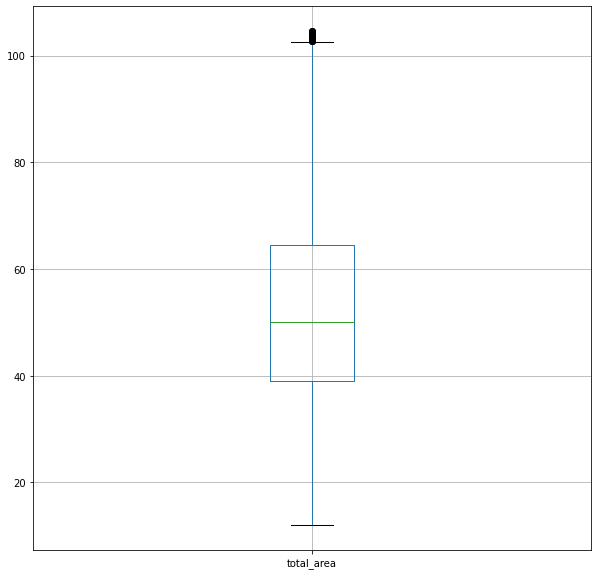

In [102]:
clean_boxplot(real_estate_data, 'total_area',1)

In [103]:
clean_boxplot(real_estate_data,'total_area',0)['total_area'].mean()

53.33608636177101

<AxesSubplot:>

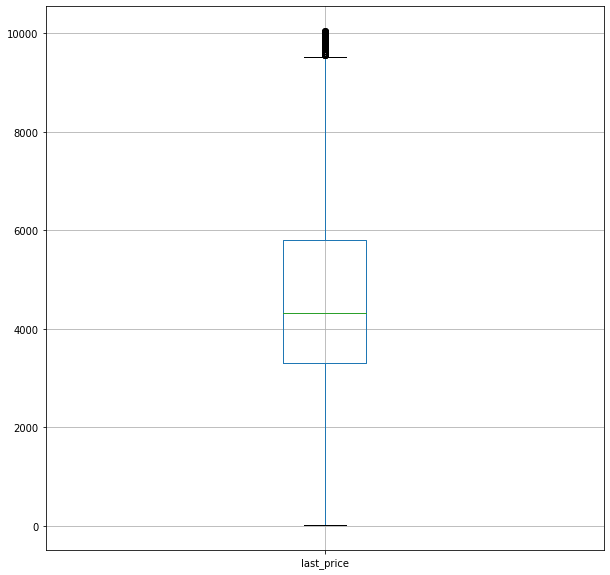

In [104]:
clean_boxplot(real_estate_data, 'last_price', 1)

In [105]:
clean_boxplot(real_estate_data,'last_price',0)['last_price'].mean()

4649.380668774553

<AxesSubplot:>

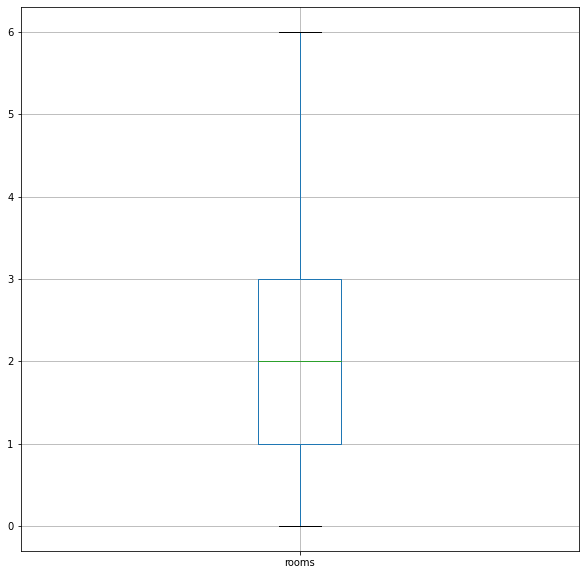

In [106]:
clean_boxplot(real_estate_data, 'rooms', 1)

In [107]:
clean_boxplot(real_estate_data,'rooms',0)['rooms'].mean()

2.0477995995398968

<AxesSubplot:>

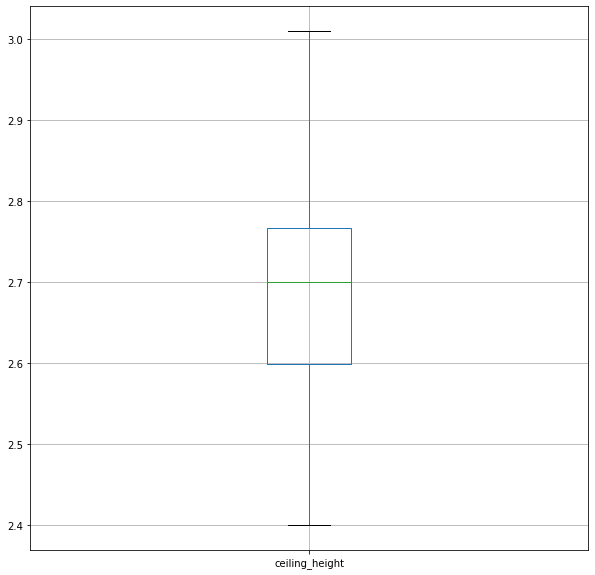

In [108]:
clean_boxplot(real_estate_data, 'ceiling_height', 1)

In [109]:
clean_boxplot(real_estate_data,'ceiling_height',0)['ceiling_height'].mean()

2.694769431852971

<AxesSubplot:>

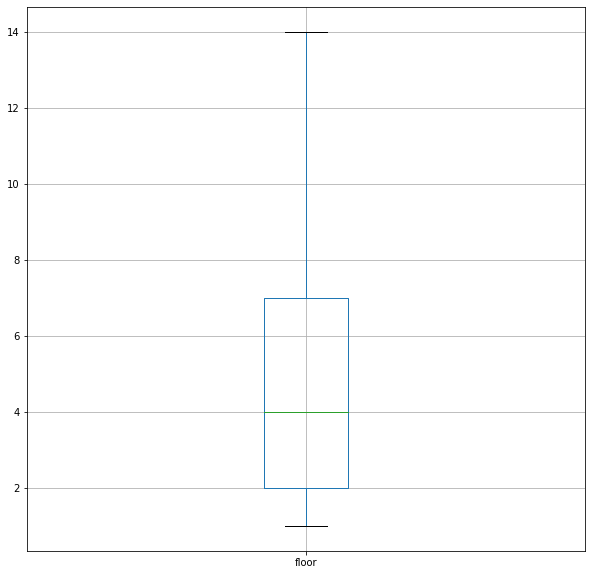

In [110]:
clean_boxplot(real_estate_data, 'floor', 1)

In [111]:
clean_boxplot(real_estate_data,'floor',0)['floor'].mean()

4.8482163353381384

Сделать новые гистограммы по колонкам с удалёнными выбросами. Увидеть, что они похожи на график "нормального" распределения

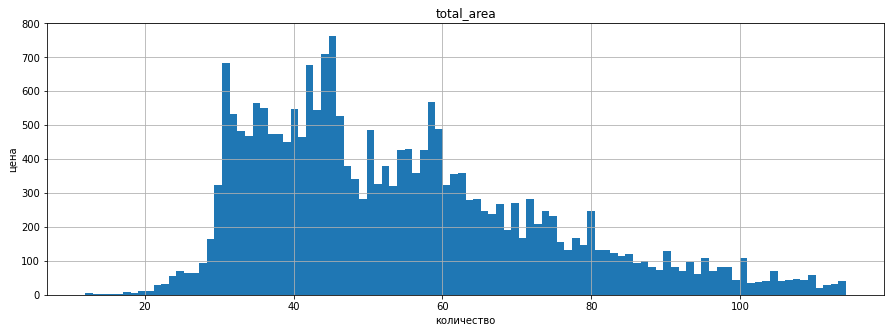

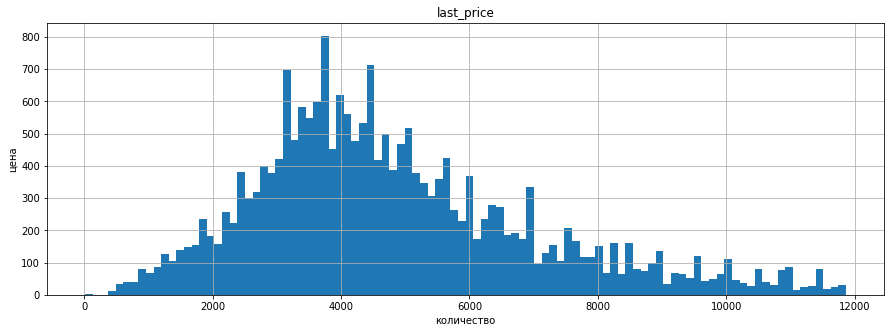

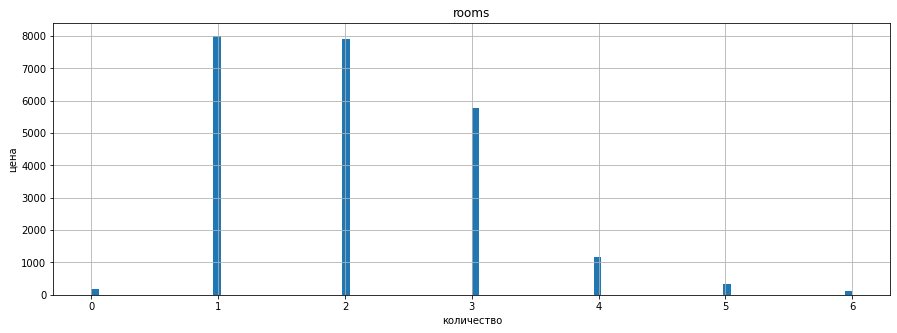

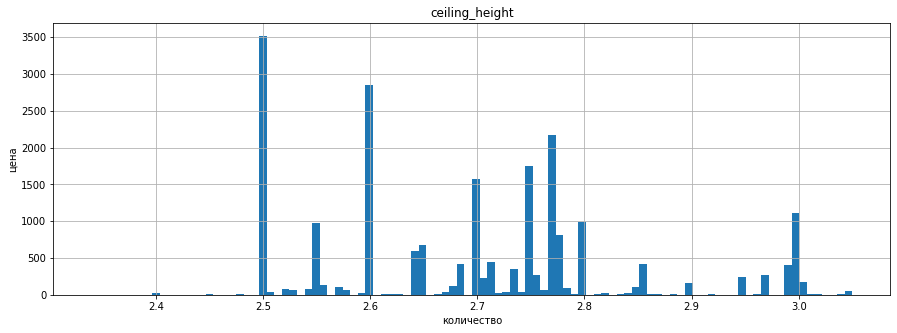

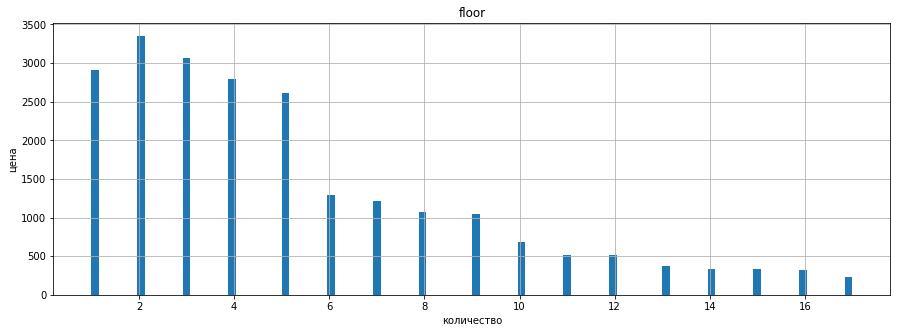

In [112]:
for column in real_estate_data[['total_area','last_price', 'rooms', 'ceiling_height', 'floor']]: 
    real_estate_data.hist(column, bins=100, figsize = (15,5))
    plt.ylabel('цена')
    plt.xlabel('количество')
    plt.show()

**Вывод**

После очистки данных от выбросов типичным объектом продажи является следующий:

    -квартиры общей площадью 53.3 кв.м
    -последняя цена размещенеия 4.6 м
    -2 комнаты
    -высота потолков 2.7м
    -5-этажный дом.

#### days_exposition

Для столбца `days_exposition` построю гистрограмм. А также посчитаю выборочную медиану и среднее. Нужно отфильтровать случаи, когда объявление было выставлено и сразу убрано. Слишком долгие неудаленные объявление отфильтровать. Мы хотим получить время продажи, а не время выставления.

<AxesSubplot:>

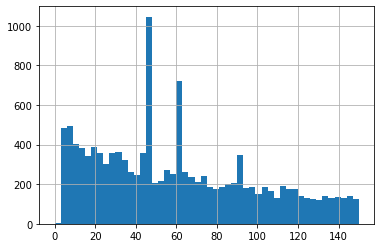

In [113]:
real_estate_data.days_exposition.hist(range = (0,150), bins=50)

На графике видим 3 пика на 45 дней, 60 и 90. Это связано с правилами площадки: в зависимости от стоимости квартиры можно разместить объявление бесплатно. 

- до 4,5 млн — 45 дней
- от 4,5 до 10 млн — 60 дней
- от 10 млн — 90 дней

Так как эти данные не дают нам представления о том, по какой цене была продана квартира (так как не факт, что квартира была продана, объявление могли просто снять по истечении бесплатного периода), предлагаю сделать срез без этих данных.

In [114]:
condition_anomalies = (
    '''
        days_exposition != 45 and \
        days_exposition != 60 and \
        days_exposition != 90 and \
        days_exposition != -1\
    '''
)

In [115]:
good_days = real_estate_data.query(condition_anomalies)

<AxesSubplot:>

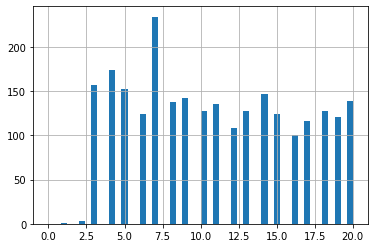

In [116]:
good_days.days_exposition.hist(range = (0,20), bins=50)

Пик на 7 днях может означать, что люди заказывают рекламный пакет на 7 дней, а затем закрывают объявление, чтобы обработать полученные заявки. Или, разочаровавшись в поиске (за 7 дней ТУРБО не нашлось покупателя, деньги на ветер!) закрывают объявление, чтобы исправить или доролнить данные.

In [117]:
condition_anomalies = (
    '''
        days_exposition != 45 and \
        days_exposition != 60 and \
        days_exposition != 90 and \
        days_exposition != -1 and \
        days_exposition !=7 \
        
    '''
)

In [118]:
good_days = real_estate_data.query(condition_anomalies)

<AxesSubplot:>

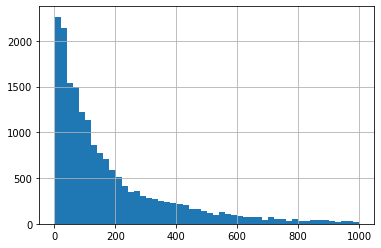

In [119]:
good_days.days_exposition.hist(range=(1,1000), bins=50)

In [120]:
fixing_outliers(good_days, ['days_exposition'])

Доля пропусков в столбце 'days_exposition': 0.00%.
Пропусков всего: 0.
--> Превращаем выбросы в пропуски данных. -->
Доля пропусков в столбце 'days_exposition': 7.10%.
Пропусков всего: 1316.



/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

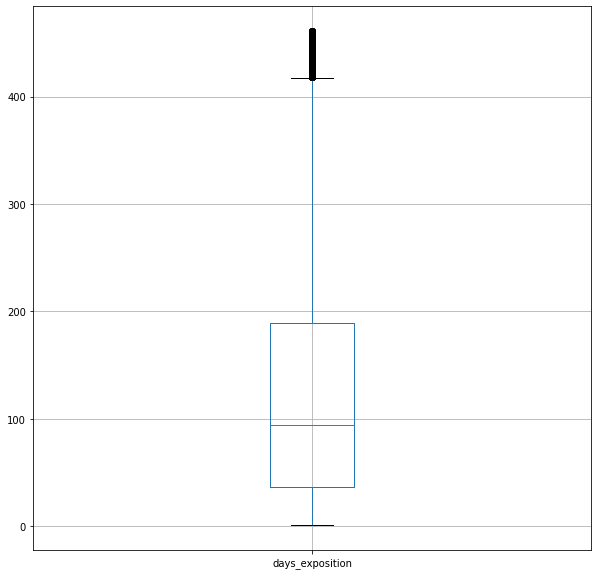

In [121]:
clean_boxplot(good_days, 'days_exposition', 1)

In [122]:
good_days.days_exposition.describe()

count    17225.000000
mean       145.395936
std        136.027899
min          1.000000
25%         39.000000
50%        100.000000
75%        208.000000
max        575.000000
Name: days_exposition, dtype: float64

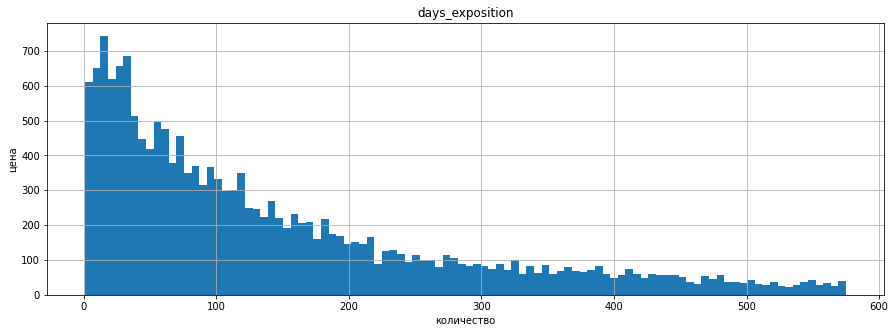

In [123]:
good_days.hist('days_exposition', bins=100, figsize = (15,5))
plt.ylabel('цена')
plt.xlabel('количество')
plt.show()

**Вывод**

Среднее время продажи квартиры 3 месяца, медианное - 5 месяцев. Можно считать, что продажи прошли очень быстро если сделка состоялась до 39 дней, необычно долго для продаж - это от 400 дней.

In [124]:
good_days['days_exposition'] = good_days['days_exposition'].fillna('mean')

/tmp/ipykernel_90/1343835889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_days['days_exposition'] = good_days['days_exposition'].fillna('mean')


### Факторы, влияющие на цену

Составим heatmap, чтобы понять, какие факторы влияют на цену в объявлении

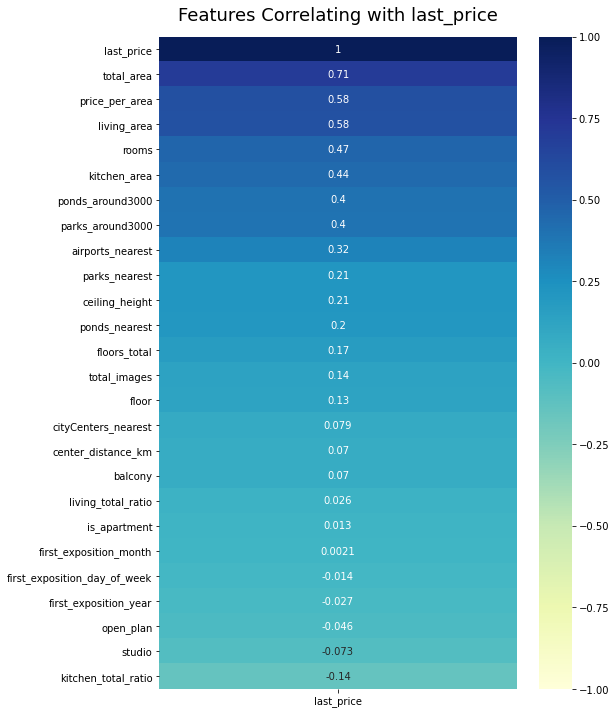

In [125]:
good_days.corr()[['last_price']].sort_values(by='last_price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(good_days.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with last_price', fontdict={'fontsize':18}, pad=16);

**Вывод**

Больше всего со стоимостью квартиры коррелирует общая площадь. Зависимость цены от числа комнат, удалённости от центра слабая.

#### total_area

0.7072874508978183


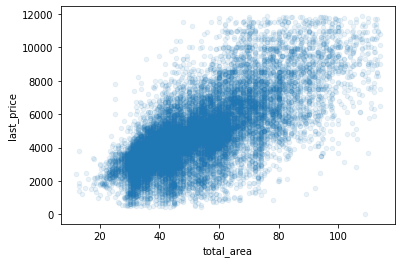

In [126]:
print(good_days['last_price'].corr(good_days['total_area']))
good_days.plot(x='total_area', y='last_price', kind='scatter', alpha=0.09)
plt.show()

**Вывод**

На стоимость квартиры общая площадь зависит напрямую.

#### floor

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

In [127]:
good_days.query('floors_total <= 9').groupby(
    ['floors_total', 'floor'], as_index=False,   
)['last_price'].median().pivot_table(index='floors_total', columns='floor')

last_price                                                  \
floor               1.0     2.0     3.0     4.0     5.0     6.0     7.0   
floors_total                                                              
1               2990.00     NaN     NaN     NaN     NaN     NaN     NaN   
2               1800.00  2100.0     NaN     NaN     NaN     NaN     NaN   
3               2970.00  3500.0  3315.0     NaN     NaN     NaN     NaN   
4               3985.45  5057.6  5450.0  5300.0     NaN     NaN     NaN   
5               3450.00  3666.0  3605.0  3650.0  3600.0     NaN     NaN   
6               4750.00  6700.0  6700.0  7225.0  6500.0  5700.0     NaN   
7               4750.00  5675.0  6550.0  5800.0  6075.0  5350.0  5550.0   
8               3700.00  5970.0  5300.0  4950.0  4550.0  5100.0  5250.0   
9               4225.00  4290.0  4350.0  4300.0  4400.0  4295.0  4300.0   

                              
floor            8.0     9.0  
floors_total                  
1                NaN     NaN  
2                NaN     NaN  
3                NaN     NaN  
4                NaN     NaN  
5                NaN     NaN  
6                NaN     NaN  
7                NaN     NaN  
8             4820.0     NaN  
9             4300.0  4200.0

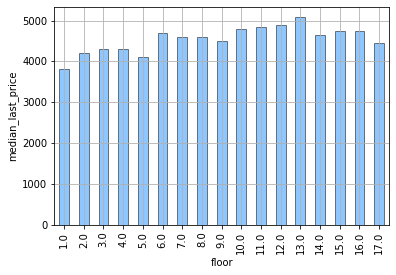

In [128]:
good_days.groupby(
    ['floor'], as_index=False,   
)['last_price'].median().plot(x='floor', y='last_price',  kind='bar', grid=True, legend=False, rot=90, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

#### rooms

<AxesSubplot:xlabel='rooms'>

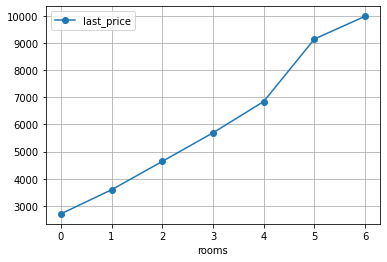

In [129]:
good_days.groupby(
    ['rooms'], as_index=False,   
)['last_price'].median().plot(x='rooms', y='last_price', style='o-', grid=True)

**Вывод**

  - В среднем цена растет с количеством комнат

#### first_day_exposition

Также изучим зависимость от даты размещения: дня недели, месяца и года.

<AxesSubplot:xlabel='first_exposition_day_of_week'>

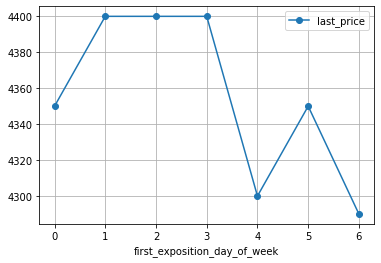

In [130]:
good_days.groupby(
    ['first_exposition_day_of_week'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_day_of_week', y='last_price', style='o-', grid=True)

<AxesSubplot:xlabel='first_exposition_month'>

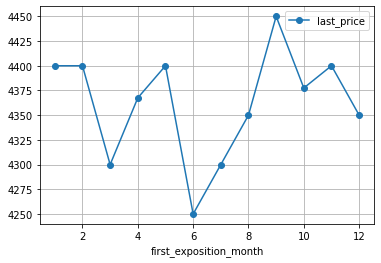

In [131]:
good_days.groupby(
    ['first_exposition_month'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_month', y='last_price', style='o-', grid=True)

<AxesSubplot:xlabel='first_exposition_year'>

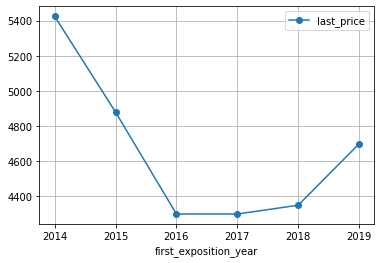

In [132]:
good_days.groupby(
    ['first_exposition_year'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_year', y='last_price', style='o-', grid=True)

**Вывод**

    - Квартиры, объявляения которых размещенны со вторника по четверг  дороже, а вот в воскресенье люди ставят цену ниже всего.
    - в июне самые маленькие цены на квартиры, затем они растут. Пик цен при продаже достигает в сентябре.
    - На графике отлично видно, как рынок вторичной недвижимости отреагировал на кризис 2014. В 2015 года покупатели перестали рассматривать вторичную недвижимость как средство для хранения своих накоплений. Однако уже в 2017 спрос начал восстановливаться, а за ним поползли и цены.

### Топ 10 населённых пунктов

Выберем 10 населённых пунктов с наибольшим числом объявлений.

Через pivot_table выберу 10 населенных пунктов с наибольшим количесвтом объявлений.  Далее через filter и pivot_table рассчитаю vg_price_per_area по полю price_per_area.

In [133]:
top_10 = good_days.pivot_table(index='locality_name', values=['rooms','price_per_area'], aggfunc={'rooms': 'count','price_per_area': 'median'})
top_10=top_10.rename(columns={"rooms": "число объявлений"}).sort_values(by='число объявлений', ascending=False).head(10).reset_index()
top_10

,locality_name,price_per_area,число объявлений
0,Санкт-Петербург,103.00,12469
1,Мурино,85.71,502
2,Кудрово,94.11,392
3,Шушары,76.34,366
4,Всеволожск,65.48,306
5,Пушкин,97.99,285
6,Колпино,74.38,272
7,Парголово,92.05,264
8,Гатчина,66.67,243
9,Выборг,56.98,179


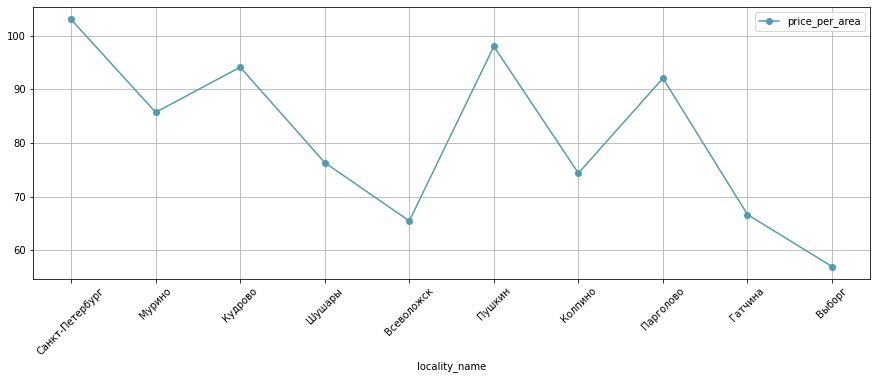

In [134]:
top_10.plot(x='locality_name', y='price_per_area', style='o-', grid=True, figsize=(15,5), color = '#539caf', alpha = 1)
plt.xticks(range(10), top_10['locality_name'], rotation=45)
plt.show()

**Вывод**

По стоиомтси квадратного метра лидирует ожидаемо мегаполис, 103тыс. руб. за кв метр. Следом за ним - город Пушкин, 97 тыс. Почти в 2 раза дешевле обойдется квадратный метр в Выборге - 57 тыс руб.

### Анализ рынка в Cанкт-Петербурге

Выделю данные для Санкт-Петербурга в переменную `spb_df`

In [135]:
spb_df = good_days.query('locality_name == "Санкт-Петербург"')

С помощью pivot_table посчитаем среднюю `price_per_area` и `last_price` с группировкой от `center_distance_km`. Назову их `avg_price_per_area` и `avg_last_price`.

In [136]:
avg_price_per_area = spb_df.pivot_table(index = 'center_distance_km', values = 'price_per_area')

In [137]:
avg_last_price = spb_df.pivot_table(index = 'center_distance_km', values = 'last_price')

Определим радиус центра. Предположим, что центр это там, где самые дорогие квартиры. Чтобы это проверить построю графики зависимостей `avg_price_per_area` и `avg_last_price` от `center_distance_km`.

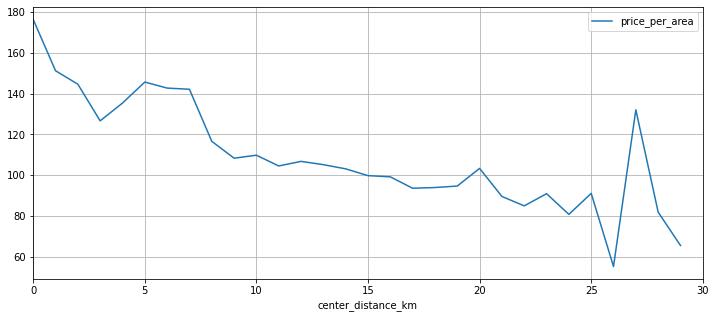

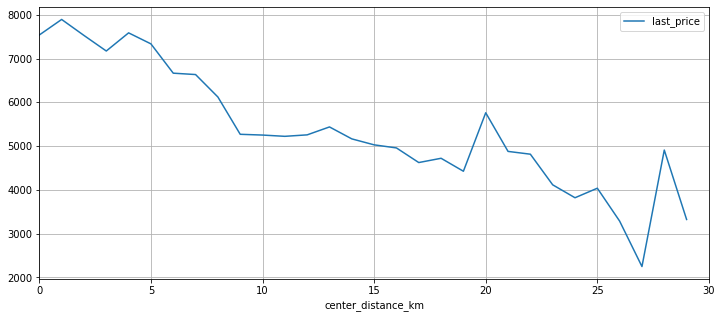

In [138]:
avg_price_per_area.plot(grid=True, figsize=(12,5))
plt.xlim(0,30)
plt.show()
avg_last_price.plot(grid=True, figsize=(12,5))
plt.xlim(0,30)
plt.show()

Самая высокая цена за квадратный метр у квартир до 7 км до центра города. Выделю квартиры в центре в отдельный датарфейм `df_spb_center`

In [139]:
df_spb_center = spb_df.query('center_distance_km <= 7 and cityCenters_nearest > -1').reset_index()
df_spb_center=df_spb_center.drop(['index'], axis=1)
df_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_type,center_distance_km,price_per_area,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_type,living_total_ratio,kitchen_total_ratio
0,0,NaN,NaN,2015-07-24,3.0,2.731545,14,136.001802,9.0,False,False,False,22.998198,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,6,408.18,4,7,2015,другой,0.855357,0.144643
1,7,NaN,NaN,2017-10-17,3.0,NaN,8,38.000000,4.0,False,False,False,50.000000,0,Санкт-Петербург,32537.0,6589.0,0.0,-1.0,3.0,99.0,541.0,город,6,279.50,1,10,2017,другой,0.236025,0.310559
2,2,NaN,NaN,2018-09-11,3.0,3.000000,9,68.000000,7.0,False,False,False,16.000000,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37.0,город,4,169.49,1,9,2018,другой,0.576271,0.135593
3,20,NaN,NaN,2017-02-17,3.0,2.900000,9,86.000000,8.0,False,False,False,24.000000,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,-1.0,144.0,город,4,183.33,4,2,2017,другой,0.477778,0.133333
4,1,8200.0,80.0,2018-11-06,3.0,NaN,3,44.200000,2.0,False,False,False,12.200000,0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0,город,3,102.50,1,11,2018,другой,0.552500,0.152500


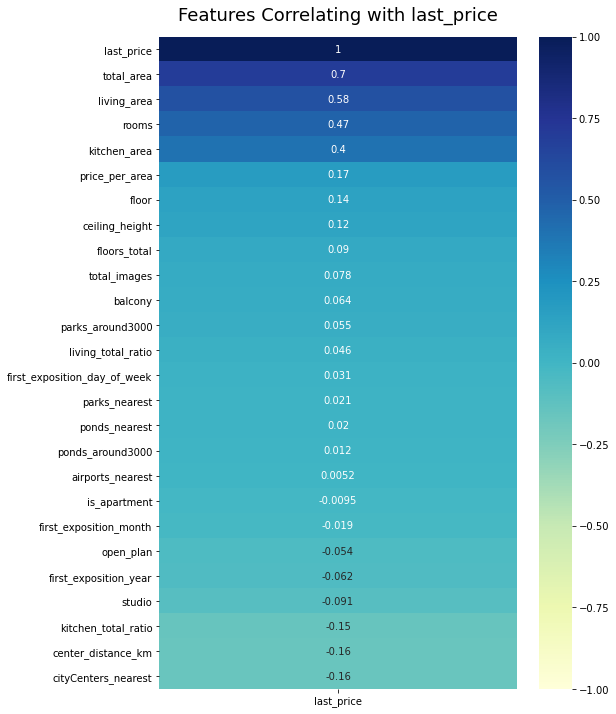

In [140]:
df_spb_center.corr()[['last_price']].sort_values(by='last_price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_spb_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with last_price', fontdict={'fontsize':18}, pad=16);

#### total_area

0.6959685937633444


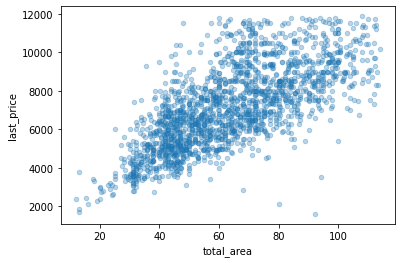

In [141]:
print(df_spb_center['last_price'].corr(df_spb_center['total_area']))
df_spb_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

**Вывод**

Нижняя границы цены увеличивается с увеличением общей площади. И в целом бОльшие квартиры дороже.

#### floor

In [142]:
df_spb_center.query('floors_total <= 10').groupby(
    ['floors_total', 'floor'], as_index=False,   
)['last_price'].median().pivot_table(index='floors_total', columns='floor')

last_price                                                   \
floor              1.0     2.0     3.0     4.0     5.0     6.0      7.0    
floors_total                                                               
2                5680.0  6500.0     NaN     NaN     NaN     NaN      NaN   
3                6150.0  7650.0  7275.0     NaN     NaN     NaN      NaN   
4                5990.0  8000.0  7050.0  7500.0     NaN     NaN      NaN   
5                5300.0  6800.0  7100.0  7100.0  6775.0     NaN      NaN   
6                5900.0  8000.0  7700.0  7770.0  7290.0  7200.0      NaN   
7                6249.5  6900.0  7775.0  7695.0  8900.0  7400.0  7600.00   
8                   NaN  6895.0  8125.0  4700.0  8550.0  9299.5  7253.54   
9                5430.0  6875.0  7525.0  6550.0  5400.0  5975.0  8721.68   
10               5410.0  7950.0  7750.0  8010.0  7500.0  7697.0  9191.60   

                                       
floor            8.0     9.0     10.0  
floors_total                           
2                 NaN     NaN     NaN  
3                 NaN     NaN     NaN  
4                 NaN     NaN     NaN  
5                 NaN     NaN     NaN  
6                 NaN     NaN     NaN  
7                 NaN     NaN     NaN  
8             8999.00     NaN     NaN  
9             5610.00  7305.0     NaN  
10            7588.29  8677.1  7950.0

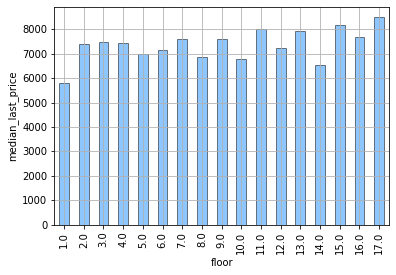

In [143]:
df_spb_center.groupby(
    ['floor'], as_index=False,   
)['last_price'].median().plot(x='floor', y='last_price',  kind='bar', grid=True, legend=False, rot=90, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

**Вывод**

    - квартиры на первых и последних этажах не обязательно дешевле квартир на других этажах.
    - Но в срденем квартиры на первых этажах дешевле. Самые дорогие - на 17

#### rooms

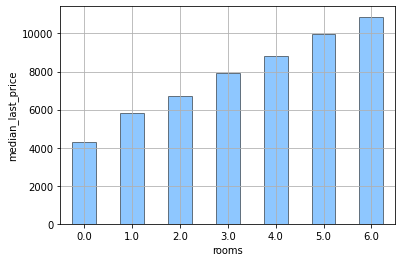

In [144]:
df_spb_center.groupby(
    ['rooms'], as_index=False,   
)['last_price'].median().plot(x='rooms', y='last_price',  kind='bar', grid=True, legend=False, rot=0, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

**Вывод**

    - Чем больше комнат, тем в среднем дороже квартирав центре Санкт-Петербурга

#### first_day_exposition

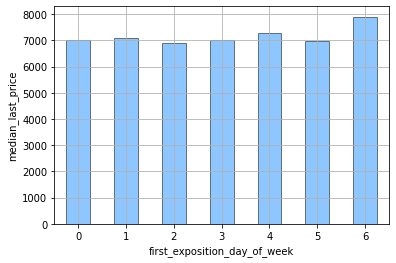

In [145]:
df_spb_center.groupby(
    ['first_exposition_day_of_week'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_day_of_week', y='last_price', kind='bar', grid=True, legend=False, rot=0, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

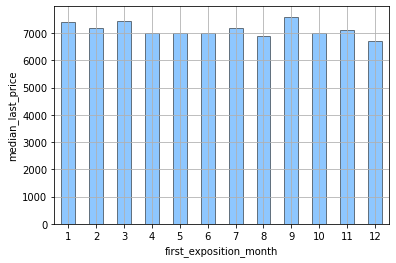

In [146]:
df_spb_center.groupby(
    ['first_exposition_month'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_month', y='last_price',  kind='bar', grid=True, legend=False, rot=0, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

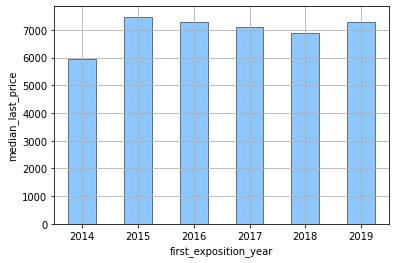

In [147]:
df_spb_center.groupby(
    ['first_exposition_year'], as_index=False,   
)['last_price'].median().plot(x='first_exposition_year', y='last_price',  kind='bar', grid=True, legend=False, rot=0, color='dodgerblue', edgecolor='black', alpha=.5)
plt.ylabel('median_last_price')
plt.show()

**Вывод**

    - Квартиры, объявляения которых размещены в среду в срднем дешевле, а вот в воскрсенье люди ставят цену выше всего.
    - в августе и декабре большйо провал в ценах, за которыми в январе и сентябре следуют подъемы
    - Цены на квартиры на протяжении 2015-2018 г.г. постепенно снижались. А вот в 2019 годузаметно подросли.

### Вывод

На стоимость квартиры в центре Санкт-Петербурга влиют

     - общая площадь - чем больше квартира, тем она дороже. Такую же зависимость мы выявили во всей базе
     - В среднем чем выше расположена квартира, тем она дороже. Однако квартиры, расположенные на первых/последних этажах далеко не всегда дешевле, чем квартиры на соседних этажах, как, например, в общей базе, где этот фактор влияет на стоимость сущетсвенно.
     - чем больше комнат, тем в среднем дороже квартира в центре Санкт-Петербурга и в остальных городах
     - в среду выставляют более дешевые квартиры, а в воскресенье - наиболее дорогие. В остальных городах дорогие выставляют со вторника по четвергам, а дешевые по воскресеньям
     - в декабре большой провал в ценах в Питере, в остальных населенных пунктах - в июне. Зато пик совпадают, и там и там в сентябре цены наиболее высоки.
     - цены падают с 2015 по 2018. В других городах спрос на вторичку растёт с 2017, а с ним и цены.

In [148]:
df_spb_center[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','price_per_area']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,price_per_area
count,1984.000000,2299.000000,2828.000000,1925.000000,2879.000000,2879.000000,2855.000000,2879.000000
mean,7259.469063,68.153649,2.665842,2.808409,7.311914,54.585241,4.169877,140.794727
std,2152.582438,22.443205,1.202112,0.149578,4.039240,40.602201,2.769883,87.935427
min,1600.000000,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,15.350000
25%,5650.000000,49.000000,2.000000,2.704582,5.000000,30.100000,2.000000,98.605000
50%,7100.000000,67.400000,3.000000,2.778731,6.000000,45.000000,4.000000,121.150000
75%,8842.500000,85.000000,3.000000,2.986831,9.000000,66.050000,5.000000,152.220000
max,11866.860000,114.200000,6.000000,3.050000,27.000000,460.000000,17.000000,1907.500000


In [149]:
good_days[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','price_per_area']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,price_per_area
count,17155.000000,17669.000000,18484.000000,17211.000000,18541.000000,18541.000000,17801.000000,18541.000000
mean,4805.675901,53.669992,2.011848,2.695289,10.855078,34.672825,5.345037,98.497708
std,2154.957726,19.087491,0.994232,0.141901,6.619011,23.200789,3.895696,47.579616
min,12.190000,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,0.110000
25%,3328.000000,39.000000,1.000000,2.599093,5.000000,18.600000,2.000000,77.080000
50%,4350.000000,49.500000,2.000000,2.700000,9.000000,30.000000,4.000000,94.310000
75%,5900.000000,64.700000,3.000000,2.766668,16.000000,42.300000,7.000000,112.360000
max,11866.860000,114.200000,6.000000,3.050000,60.000000,460.000000,17.000000,1907.500000


## Общий вывод

Целью нашего исследования были факторы, которые больше всего влияют на стоимость квартир.

Данные по некоторым показателям нуждались в предбработке. В таблице нашлись аномалии, такие как пропуски значений, явные и нявные дубликаты, опечатки, дробные числа. Всё это нужно было исправить и подготовить для дальнейшей работы.
    
Были отфитрованы объявления,чей срок был 30, 45 или 90 дней были отфитрованы, так как это срок бесплатного размещения. Эта информация не дает представления о том, когда объект был продан и по какой цене. Скорее всего его сняли раньше фактической продажи.

Средний срок размещения объявлений 100 дней
По стоимости квадратного метра лидирует ожидаемо мегаполис, 103тыс. руб. за кв метр. Следом за ним - город Пушкин, 97 тыс. Почти в 2 раза дешевле обойдется квадратный метр в Выборге - 57 тыс руб.

Для автоматизированной системы будет полезно обратить внимание на фильтры, указанные выше, а также на особенности, которые есть только у квартир, расположенных в центре мегаполиса.
